# Regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

### Pendulum Decay

Read the data from the CSV file

In [2]:
df = pd.read_csv("Pendulum Decay.csv")
df

,Time (s),Energy (J)
0,0.004167,0.006415
1,0.012500,0.006349
2,0.020833,0.006316
3,0.029167,0.006248
4,0.037500,0.006216
...,...,...
68359,570.454167,0.000523
68360,570.462500,0.000529
68361,570.470833,0.000535
68362,570.479167,0.000529


Plot it

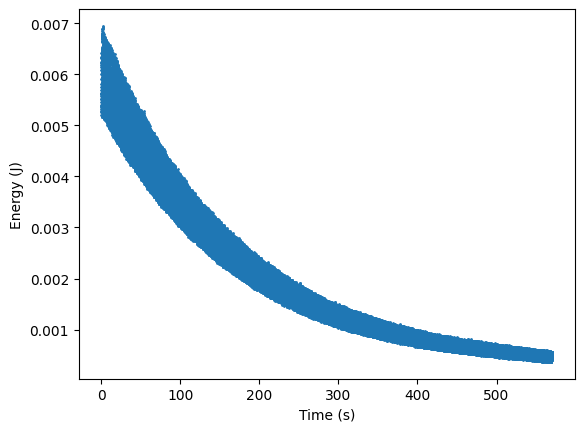

In [3]:
t = df["Time (s)"]
energy = df["Energy (J)"]
plt.scatter(t, energy, s=1)
plt.xlabel("Time (s)")
plt.ylabel("Energy (J)")
plt.show()

Why can't we see anything? It turns out that the data is too closely spaced.

We can sample it. Taking 1 point out of every 100 points,

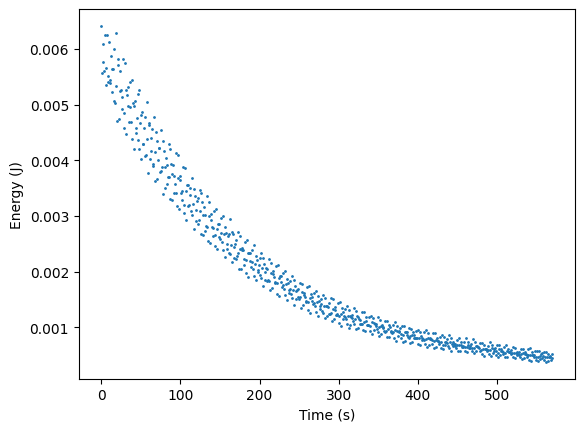

In [4]:
n_sample = 100
t_sample = t[::n_sample]
energy_sample = energy[::n_sample]

plt.scatter(t_sample, energy_sample, s=1)
plt.xlabel("Time (s)")
plt.ylabel("Energy (J)")
plt.show()

We define a fitting equation: $$ y=A e^{-\alpha x} $$
Why? Because $y=e^{-x}$ looks like this

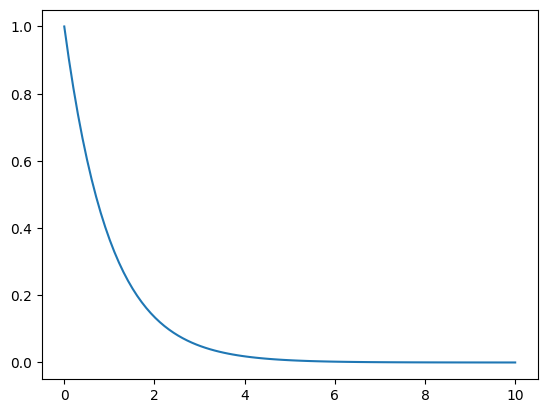

In [5]:
plt.plot(np.linspace(0, 10, 100), np.exp(-np.linspace(0, 10, 100)))
plt.show()

We just need to scale $x$ and $y$ to match the data, hence $A$ and $\alpha$.

In [6]:
def func(x, A, alpha):
    return A*np.exp(-alpha*x)

Fit and plot the results

In [7]:
popt, pcov = curve_fit(func, t_sample, energy_sample)

c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


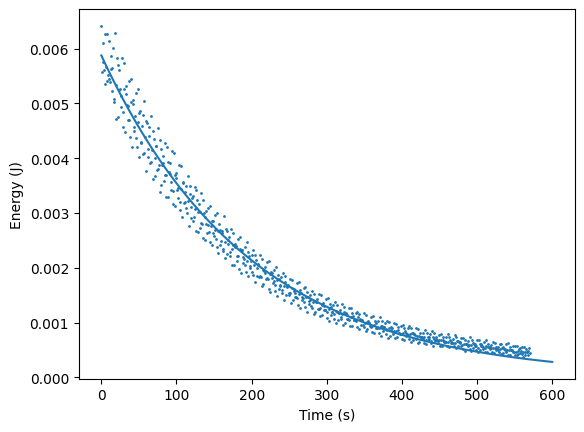

In [8]:
xLin = np.linspace(0, 600, 100)
plt.scatter(t_sample, energy_sample, s=1)
plt.plot(xLin, func(xLin, *popt))
plt.xlabel("Time (s)")
plt.ylabel("Energy (J)")
plt.show()

In [9]:
popt

array([0.00587586, 0.00505577])

Fitted values are:
$$A = 0.00587586$$
$$\alpha = 0.00505577$$
So the predictive equation is:
$$y = 0.00587586 e^{-0.00505577 x}$$

At x=600, y is

In [10]:
func(600, *popt)

0.00028291544023655783

Which corresponds to this point on the graph

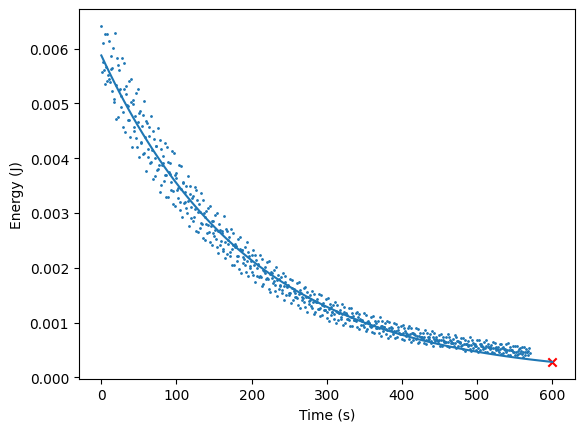

In [11]:
xLin = np.linspace(0, 600, 100)
plt.scatter(t_sample, energy_sample, s=1)
plt.plot(xLin, func(xLin, *popt))
plt.scatter(600, 0.00028291544023655783, marker="x", color="r")
plt.xlabel("Time (s)")
plt.ylabel("Energy (J)")
plt.show()

# Classification

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier
import sklearn.datasets
from sklearn.model_selection import train_test_split

## Introduction

Load the dataset

In [13]:
irisData = sklearn.datasets.load_iris()
print(irisData.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Print a sample of the dataset

In [15]:
df = pd.DataFrame(irisData.data)
df.columns = irisData.feature_names
df["species"] = irisData.target_names[irisData.target]
df.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
19,5.1,3.8,1.5,0.3,setosa
118,7.7,2.6,6.9,2.3,virginica
119,6.0,2.2,5.0,1.5,virginica
9,4.9,3.1,1.5,0.1,setosa
123,6.3,2.7,4.9,1.8,virginica
48,5.3,3.7,1.5,0.2,setosa
93,5.0,2.3,3.3,1.0,versicolor
100,6.3,3.3,6.0,2.5,virginica
10,5.4,3.7,1.5,0.2,setosa
102,7.1,3.0,5.9,2.1,virginica


Plot a scatter with the unknown species highlighted in red

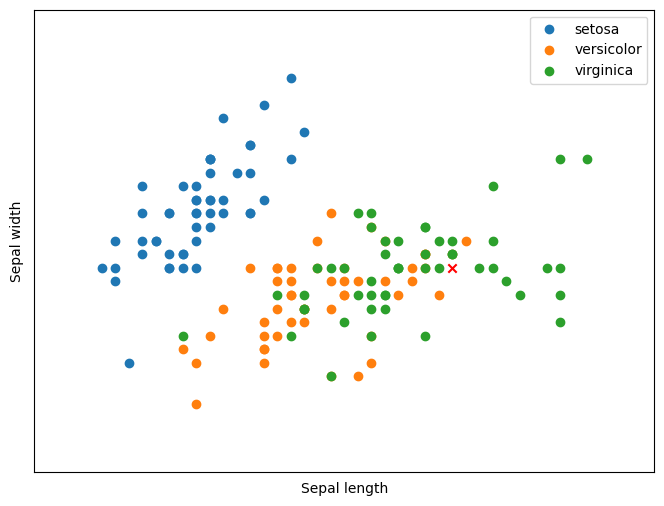

In [143]:
X = irisData.data[:, :2]
y = irisData.target

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

plt.figure(2, figsize=(8, 6))
plt.clf()

colors = ["C0", "C1", "C2"]
labels = ["setosa", "versicolor", "virginica"]
for idx in range(len(colors)):
    plt.scatter(X[:, 0][y==idx], X[:, 1][y==idx], c=colors[idx], label=labels[idx])
plt.scatter(6.9, 3, c="r", marker="x")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.legend()
# plt.savefig("Presentation Images/iris scatter.svg", transparent=True)
plt.show()

It seems that the unknown species is virginica. While we can visually assign the class for one point, imagine doing so for thousands of points. How can we make the computer do this automatically?

## KNN

Train a K Nearest Neighbours classifier.

We want to see how accurate it is. So, we split the data into training and testing data. The model will use the training data as "neighbours" to assign classes to the testing data.

Then, we compare the model-assigned classes to the actual classes.

In [89]:
x = df.loc[:, ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]].values
y = df["species"].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=27)

First 5 rows of training data

In [94]:
df_train = pd.DataFrame(np.concatenate((x_train, np.array([np.array(y_train)]).T), axis=1))
df_test = pd.DataFrame(np.concatenate((x_test, np.array([np.array(y_test)]).T), axis=1))
df_train.columns=["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)", "species"]
df_test.columns=["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)", "species"]
df_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,6.3,2.7,4.9,1.8,virginica
1,5.0,3.5,1.3,0.3,setosa
2,6.4,2.7,5.3,1.9,virginica
3,6.2,2.9,4.3,1.3,versicolor
4,6.7,3.1,4.7,1.5,versicolor


First 5 rows of testing data

In [96]:
df_test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,6.5,3.0,5.5,1.8,virginica
1,5.5,3.5,1.3,0.2,setosa
2,6.4,2.8,5.6,2.1,virginica
3,7.7,3.8,6.7,2.2,virginica
4,5.6,3.0,4.1,1.3,versicolor


In [97]:
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(x_train, y_train)
KNN_prediction = KNN_model.predict(x_test)
print("KNN Accuracy:", accuracy_score(KNN_prediction, y_test))

KNN Accuracy: 0.9666666666666667


It seems that the classifier is pretty accurate. 

But what did the model classify incorrectly? We can plot a *Confusion Matrix*.

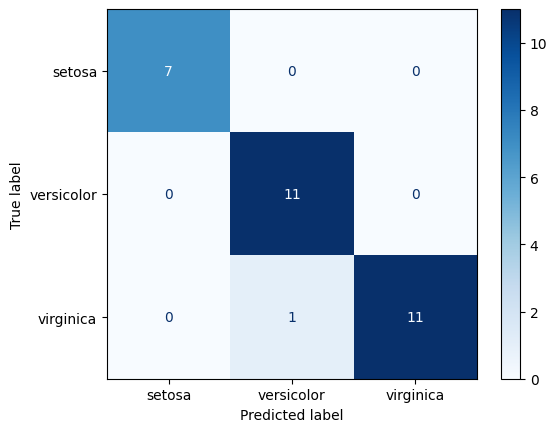

In [98]:
confusion_matrix(KNN_prediction, y_test)

disp = ConfusionMatrixDisplay.from_estimator(
    KNN_model,
    x_test,
    y_test,
    display_labels=irisData.target_names,
    cmap=plt.cm.Blues,
)

plt.show()

Out of 29 testing data points, the model assigned the wrong class for only 1.

One of the virginica flowers was incorrectly thought to be versicolor.

We can plot a *Decision Boundary*. This tells what class the model will assign for any point.

In [99]:
x = df.loc[:, ["sepal length (cm)", "sepal width (cm)"]].values
y = irisData.target

x_min, x_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
y_min, y_max = x[:, 1].min() - 0.5, x[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                 np.arange(y_min, y_max, 0.01))

KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(x, y)
KNN_prediction = KNN_model.predict(np.c_[xx.ravel(), yy.ravel()])
KNN_prediction = KNN_prediction.reshape(xx.shape)

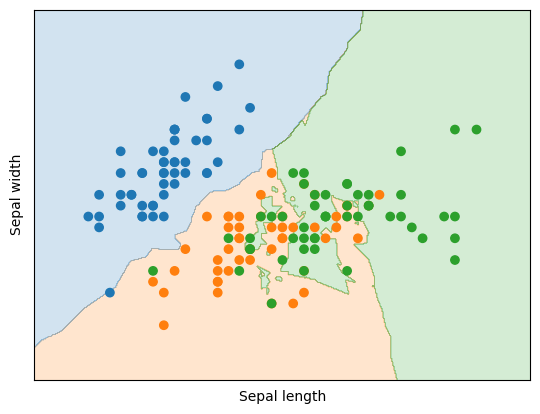

In [100]:
cmap = matplotlib.colors.ListedColormap(["C0", "C1", "C2"])

plt.contourf(xx, yy, KNN_prediction, alpha=0.2, cmap=cmap)
plt.scatter(df["sepal length (cm)"], df["sepal width (cm)"], c=irisData.target, cmap=cmap)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
# plt.savefig("Presentation Images/iris example.svg", transparent=True)
plt.show()

# Clustering

In [79]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd

import sklearn.datasets
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbow

## Iris Dataset

Let's use the *Iris Dataset* again, but this time, we pretend we don't know the flower species.

In [8]:
iris = sklearn.datasets.load_iris()
df = pd.DataFrame(iris.data)
df.columns = iris.feature_names

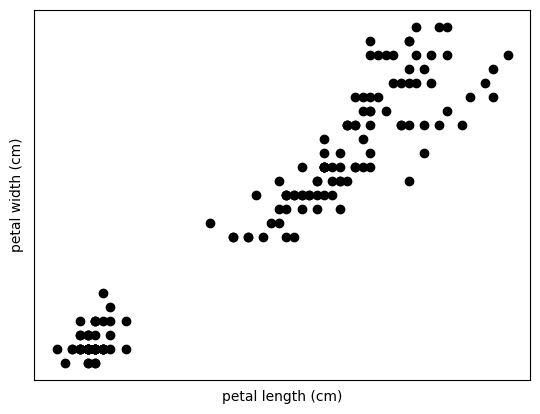

In [12]:
plt.scatter(df["petal length (cm)"], df["petal width (cm)"], color="k")
plt.xticks(())
plt.yticks(())
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
# plt.savefig("Presentation Images/iris_cluster_1.svg", transparent=True)
plt.show()

We try clustering with 2 clusters

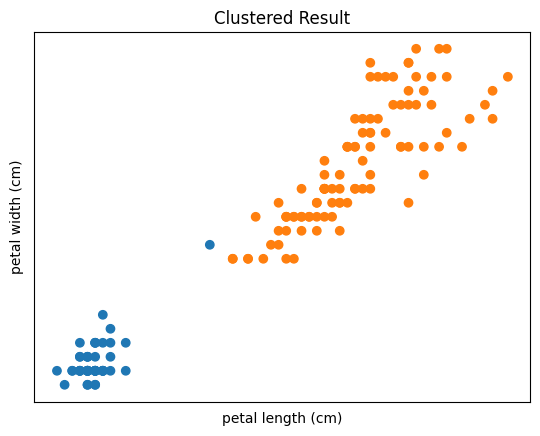

In [56]:
cmap = ListedColormap(["C0", "C1"])
kmeans = KMeans(n_clusters=2).fit(df.iloc[:, 2:])
plt.scatter(df["petal length (cm)"], df["petal width (cm)"], c=kmeans.labels_, cmap=cmap)
plt.xticks(())
plt.yticks(())
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.title("Clustered Result")
# plt.savefig("Presentation Images/iris_cluster_2.svg", transparent=True)
plt.show()

Okay... But because we are cheaters ~~SOL~~ and we know that there are 3 flower species, we try clustering with 3 cluster.

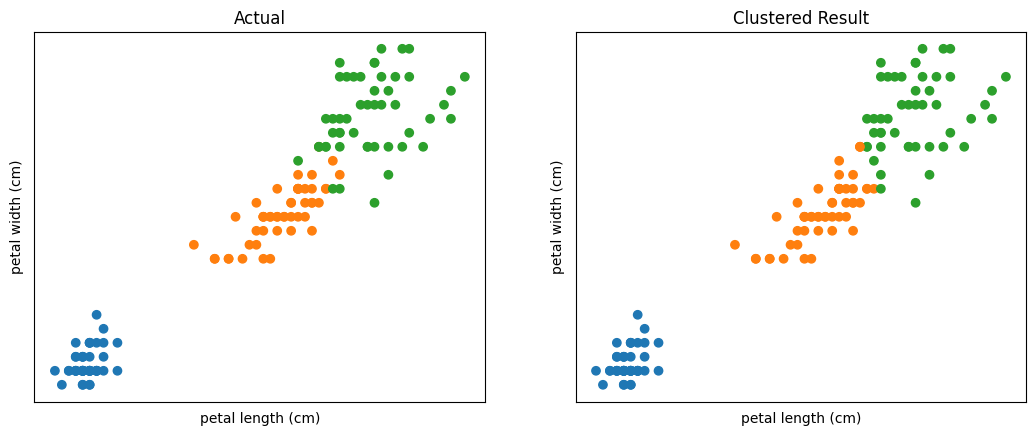

In [57]:
cmap = ListedColormap(["C0", "C1", "C2"])
kmeans = KMeans(n_clusters=3, random_state=0).fit(df.iloc[:, 2:])
labels = kmeans.labels_.copy()
labels[kmeans.labels_ == 0] = 0
labels[kmeans.labels_ == 2] = 1
labels[kmeans.labels_ == 1] = 2

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12.8, 4.8)

ax2.scatter(df["petal length (cm)"], df["petal width (cm)"], c=labels, cmap=cmap)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_xlabel("petal length (cm)")
ax2.set_ylabel("petal width (cm)")
ax2.set_title("Clustered Result")

ax1.scatter(df["petal length (cm)"], df["petal width (cm)"], c=iris.target, cmap=cmap)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_xlabel("petal length (cm)")
ax1.set_ylabel("petal width (cm)")
ax1.set_title("Actual")
plt.show()

Pretty Accurate.

But one would be forgiven for assuming there're 2 clusters at first glance. How do we decide how many clusters to have? How do we know that in this case, there're actually 3 clusters when we don't know the number of flower species?

## Elbow Plot

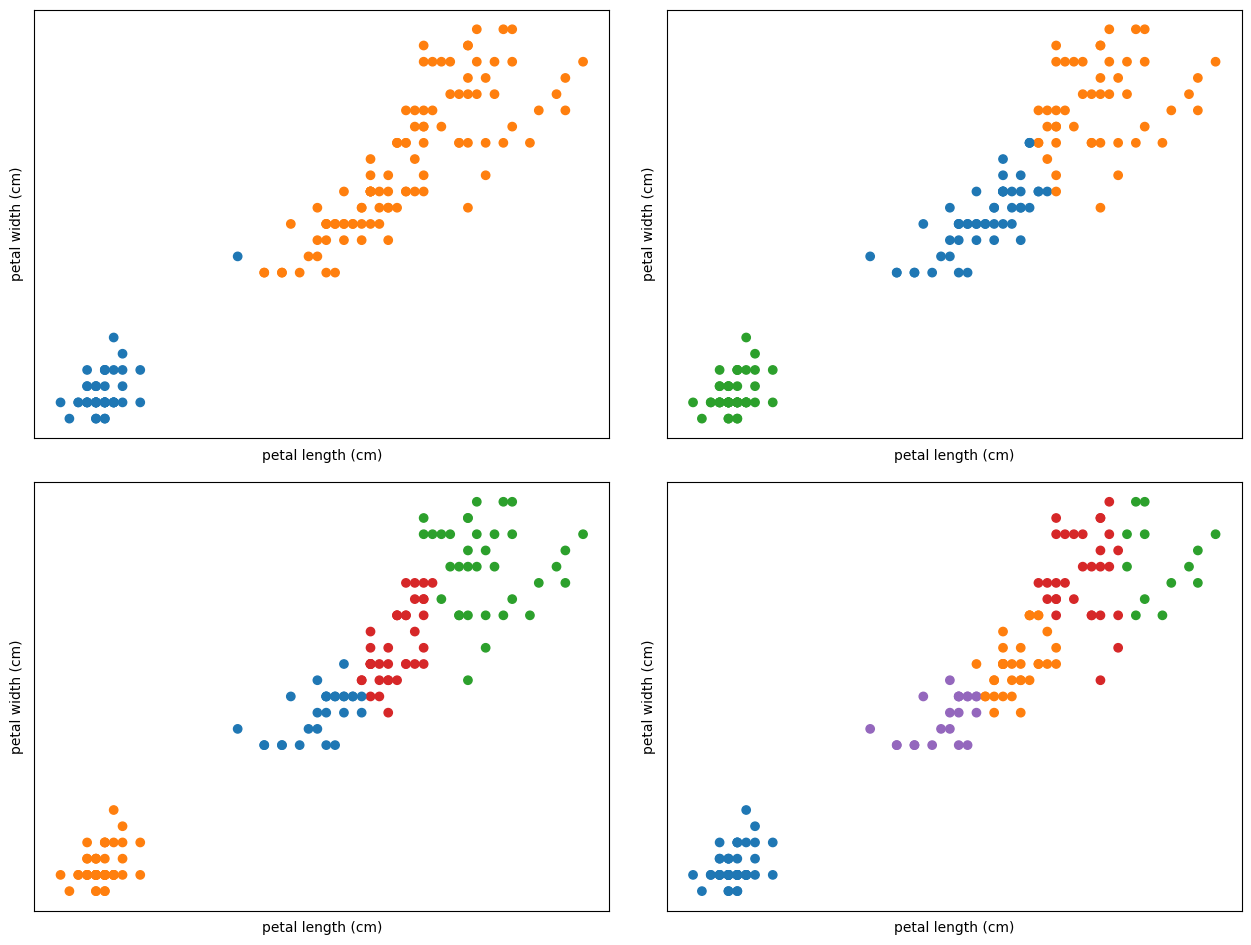

In [74]:
colors = ["C0", "C1", "C2", "C3", "C4"]

fig, axes = plt.subplots(2, 2)
axes = axes.flatten()
fig.set_size_inches(12.8, 9.6)
fig.tight_layout()

for n_clusters in [2, 3, 4, 5]:
    curr_axes = axes[n_clusters-2]
    cmap = ListedColormap(colors[:n_clusters])
    kmeans = KMeans(n_clusters=n_clusters).fit(df.iloc[:, 2:])
    curr_axes.scatter(df["petal length (cm)"], df["petal width (cm)"], c=kmeans.labels_, cmap=cmap)
    curr_axes.set_xticks(())
    curr_axes.set_yticks(())
    curr_axes.set_xlabel("petal length (cm)")
    curr_axes.set_ylabel("petal width (cm)")

# fig.savefig("Presentation Images/iris_cluster_n.svg", transparent=True)

By clustering the data into different numbers of clusters, we see that as the number of clusters increase, the variance (i.e. how spread out the data points are) of each cluster decreases.

We can visualise this in an *Elbow Plot*.

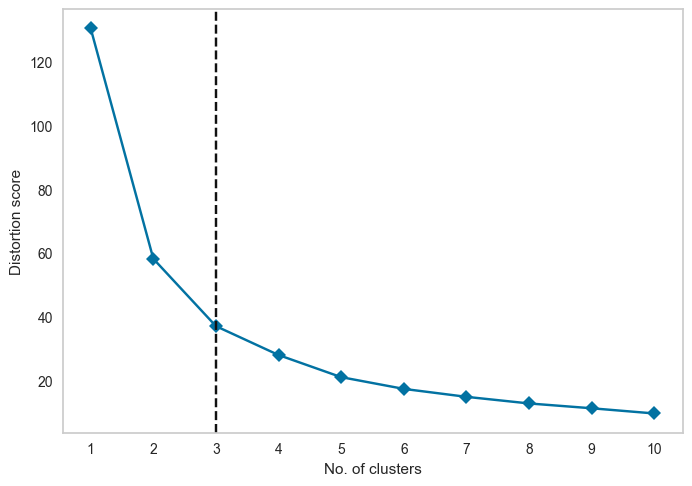

In [99]:
Elbow = KElbow(KMeans(), k=(1,11), timings=False, locate_elbow=True)
Elbow.fit(df.iloc[:, :2])
plt.xlabel("No. of clusters")
plt.ylabel("Distortion score")
plt.xticks(range(1, 11))
plt.grid(False)
# plt.savefig("Presentation Images/elbow.svg", transparent=True)

## Customer Segmentation

# Data Processing

## Moving Average

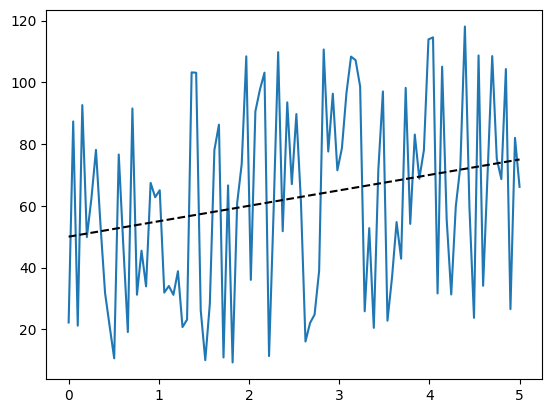

In [140]:
np.random.seed(5)
x = np.linspace(0, 5, 100)
y = 5*x + 100*(np.random.rand(100)-0.5) + 50
plt.plot(x,y)
plt.plot(x, 5*x+50, color="k", linestyle="--")

In [141]:
n_ave = 10
x_ave = np.convolve(x, np.ones(n_ave), "valid")/n_ave
y_ave = np.convolve(y, np.ones(n_ave), "valid")/n_ave

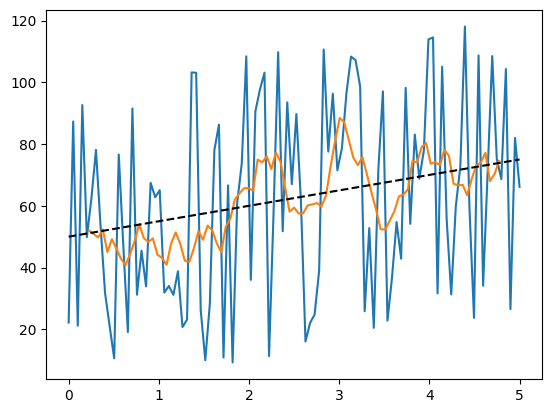

In [142]:
plt.plot(x,y)
plt.plot(x_ave, y_ave)
plt.plot(x, 5*x+50, color="k", linestyle="--")